#Estes dados são resultados de uma análise química de vinhos cultivados na mesma região na Itália, mas derivados de três diferentes cultivos. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

##PASSOS DA CATEGORIZAÇÃO

* INICIALIZAÇÃO

* CARREGAMENTO BASE

* CONVERSÃO DE ATRIBUTOS CATEGÓRICOS EM BINÁRIO

* DIVISÃO EM TREINO E TESTE

* TREINAMENTO DA REDE NEURAL

* AVALIAÇÃO DE RESULTADOS




#Início

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")

In [4]:
!ls

cars.csv	 concreto.csv  kddCup.txt  vinho.txt
casasBoston.csv  Espaço.csv    Ratos.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df1 = pd.read_csv('vinho.txt', header=0)
df1.head()

,Tipo,Alcool,acido malico,Ash,Alcalinidade da cinza,Magnesio,fenois totais,flavonoides,Fenois n flavanoides,Proantocianinas,intensidade da cor,matiz,OD280 OD315 de vinhos diluídos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Estrutura dos dados

In [8]:
df1.shape

(178, 14)

76 colunas de níveis de expressão de proteínas<br>
1 coluna de ID
1 coluna de categoria de grupo (controle ou trissomia)<br>
1 coluna de categoria de tratamento (memantina ou salina)<br>
1 coluna de categoria de atitude ('C/S', 'S/C')<br>
1 coluna de categoria de classe ('c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s', 't-SC-m', 't-SC-s')<br>


In [9]:
df1.dtypes

Tipo                                int64
Alcool                            float64
acido malico                      float64
Ash                               float64
Alcalinidade da cinza             float64
Magnesio                            int64
fenois totais                     float64
flavonoides                       float64
Fenois n flavanoides              float64
Proantocianinas                   float64
intensidade da cor                float64
matiz                             float64
OD280 OD315 de vinhos diluídos    float64
prolina                             int64
dtype: object

In [ ]:
#df1['Treatment'] = df1['Treatment'].astype('category')
#df1['Treatment'].dtypes

In [ ]:
#df1['Behavior'] = df1['Behavior'].astype('category')
#df1['Behavior'].dtypes

In [ ]:
#df1['Genotype'] = df1['Genotype'].astype('category')
#df1['Genotype'].dtypes

#Conversão de atributos categóricos em binário (Encoder)

In [14]:
df1['Tipo'] = df1['Tipo'].astype('category')
df1['Tipo'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [15]:
df1.dtypes

Tipo                              category
Alcool                             float64
acido malico                       float64
Ash                                float64
Alcalinidade da cinza              float64
Magnesio                             int64
fenois totais                      float64
flavonoides                        float64
Fenois n flavanoides               float64
Proantocianinas                    float64
intensidade da cor                 float64
matiz                              float64
OD280 OD315 de vinhos diluídos     float64
prolina                              int64
dtype: object

#Divisão dos dados

In [38]:
import random
np.random.seed(1) #semente inicial


In [39]:
nlinhas = df1.shape[0]
nlinhas

178

In [40]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'Alcool':'prolina'], df1.loc[:,'Tipo'], test_size=0.4)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [41]:
x_train.shape

(106, 13)

In [42]:
y_train.shape

(106,)

In [43]:
x_test.shape

(72, 13)

In [44]:
y_test.shape

(72,)

In [45]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [47]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [48]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [49]:
X_train_normalized.head()

,Alcool,acido malico,Ash,Alcalinidade da cinza,Magnesio,fenois totais,flavonoides,Fenois n flavanoides,Proantocianinas,intensidade da cor,matiz,OD280 OD315 de vinhos diluídos,prolina
0,0.818193,0.112254,1.189614,1.454192,0.557477,-1.095825,-1.097546,0.192840,0.039526,1.609645,-0.919271,-1.040149,0.061555
1,0.421296,1.551985,-0.360046,0.061042,1.843962,-1.031623,-1.249943,0.518593,-0.300670,2.273445,-1.547771,-1.367398,0.354532
2,-0.218861,0.832120,-1.369127,-1.177314,-1.586665,-0.967421,-0.680994,0.518593,-1.231733,-0.657619,-1.086871,-0.603816,-1.241334
3,-1.640010,-0.480576,-1.585359,-1.177314,-0.128648,-0.999522,-0.355881,-0.214352,-0.658771,-0.485203,1.133831,-0.576546,-1.048314
4,-0.014011,1.145473,1.045460,-0.372383,0.300180,0.284518,0.497543,-0.947296,0.827349,-0.183476,0.295830,1.305139,0.130490


In [50]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,Alcool,acido malico,Ash,Alcalinidade da cinza,Magnesio,fenois totais,flavonoides,Fenois n flavanoides,Proantocianinas,intensidade da cor,matiz,OD280 OD315 de vinhos diluídos,prolina
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,-1.147929e-15,-5.446377e-17,-1.571070e-17,-8.913206e-16,-2.579174e-17,2.403738e-16,-2.052865e-16,2.021444e-16,-6.258097e-16,-1.309225e-16,-5.425429e-16,-3.294011e-16,2.513713e-17
std,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00
min,-2.446608e+00,-1.310539e+00,-2.378208e+00,-2.663341e+00,-1.758196e+00,-2.010704e+00,-1.605536e+00,-1.924555e+00,-1.983745e+00,-1.571421e+00,-1.673472e+00,-1.762825e+00,-1.565333e+00
25%,-7.309870e-01,-7.092393e-01,-5.762777e-01,-7.051909e-01,-8.790980e-01,-8.149414e-01,-8.968901e-01,-7.844195e-01,-6.721996e-01,-7.955512e-01,-8.564209e-01,-8.731155e-01,-7.915274e-01
50%,6.920944e-02,-4.128241e-01,-3.569862e-02,-7.827341e-02,-4.288283e-02,-5.254267e-02,-4.092675e-02,-2.143517e-01,-1.037142e-01,-1.942521e-01,4.442985e-02,2.688488e-01,-2.021253e-01
75%,7.253705e-01,8.194163e-01,7.121024e-01,5.254249e-01,4.717111e-01,6.657172e-01,7.642376e-01,6.407501e-01,6.303930e-01,3.553224e-01,6.729304e-01,8.040380e-01,5.251486e-01
max,2.418586e+00,2.712239e+00,3.135699e+00,2.692547e+00,3.044681e+00,2.643941e+00,3.210210e+00,2.147358e+00,3.692157e+00,3.480354e+00,3.145032e+00,1.959638e+00,2.681119e+00


In [51]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# SGD = gradiente descendente estocático

In [52]:
numClasses = len(y_train.values.categories) # sabemos que são 8 categoria
numClasses

3

In [54]:
# Criar encoder para classe: categórico para numérico
# é necessário, não trabalha com categórico letras. Ver RN_Aula01.ipynb, o dado é categórico numérico, não precisou desse tratamento de dados.
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labelencoder_y = labelencoder_y.fit(y_train)

labelencoder_y.classes_

array([1, 2, 3])

In [55]:
#aplicar encoder no treino e no teste
y_train = labelencoder_y.transform(y_train)
y_test  = labelencoder_y.transform(y_test)

In [56]:
RN = Sequential()
RN.add(Dense(8,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
           # 3 é o número de neurônios
           # input_shape é a tamanho do input, que é 30. Neste formato fica automatizado
RN.add(Dense(numClasses,activation = 'sigmoid'))
           # numClasses = 3. Neste formato fica automatizado
RN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.utils import to_categorical

In [58]:
# configuração e treinamento da rede neural 

sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 1000, verbose = 1) # configuração e treinamento da rede neural 
          # RN.fit(dados de entrada,dados de saída,loops de treinamento, mostar metrica por loop, ou seja o loss e metrics)    

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.3302
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.3491
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.3491
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.3491
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.3585
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.3585
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.3585
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.3679
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.3679
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.3679
Epoch 11/1000
4/4 [

In [59]:
# Avaliar base de teste
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.11504203826189041
Test accuracy: 0.9305555820465088


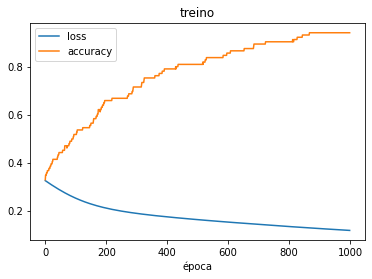

In [60]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['accuracy'], label='accuracy')
plt.title('treino')
plt.xlabel('época')
plt.legend();

#Avaliação de Resultados

In [61]:
# previsões sobre os dados de teste
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test

In [62]:
y_test_predicted

array([[0.2641955 , 0.31184578, 0.4741957 ],
       [0.23763502, 0.5942005 , 0.30200794],
       [0.6468885 , 0.17936951, 0.23978546],
       [0.46153334, 0.3053961 , 0.3117804 ],
       [0.62644696, 0.19171396, 0.19509482],
       [0.17298621, 0.48060963, 0.48086542],
       [0.23486766, 0.5062664 , 0.38204733],
       [0.6399305 , 0.18880254, 0.18120432],
       [0.18430525, 0.4960714 , 0.5506311 ],
       [0.15438437, 0.62901855, 0.3777116 ],
       [0.5221542 , 0.25659853, 0.17944846],
       [0.53689444, 0.24790192, 0.28679702],
       [0.25250274, 0.63949597, 0.26858574],
       [0.6662569 , 0.20359784, 0.16423845],
       [0.34960693, 0.42539406, 0.3413911 ],
       [0.20774809, 0.6641201 , 0.28681022],
       [0.2732243 , 0.2975851 , 0.56299996],
       [0.5385306 , 0.30554354, 0.19892094],
       [0.16825232, 0.66929984, 0.35339832],
       [0.5959235 , 0.22916329, 0.18642601],
       [0.5889616 , 0.22198063, 0.1954008 ],
       [0.3114248 , 0.5936784 , 0.24820945],
       [0.

In [63]:
y_test_predicted_indexes

array([2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0,
       1, 0, 1, 0, 2, 2])

In [64]:
#matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes) 
confMatrix

array([[28,  4,  0],
       [ 0, 23,  1],
       [ 0,  0, 16]])

In [66]:
# Matriz de confusão
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1', '2'], columns=['0', '1', '2'],)
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)

Predicted   0   1   2
Actual               
0          28   4   0
1           0  23   1
2           0   0  16
